## **2_Data_Preprocessing_and_Feature_Engineering.ipynb**

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIR = "/content/drive/MyDrive/Project/healthcare/"


In [ ]:
!pip install missingno

In [15]:
# 📚 Import core libraries
import pandas as pd
import numpy as np
import os

# 📍 Set base path to your project data
base_path = "/content/drive/MyDrive/Project/healthcare/"

# 📥 Load all training files
train_y = pd.read_csv(base_path + "Train-1542865627584.csv")
train_beneficiary = pd.read_csv(base_path + "Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv(base_path + "Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv(base_path + "Train_Outpatientdata-1542865627584.csv")

# 🧾 Concatenate inpatient and outpatient data
train_claims = pd.concat([train_inpatient, train_outpatient], axis=0, ignore_index=True)

# 🔄 Merge with beneficiary info
merged_df = pd.merge(train_claims, train_beneficiary, on="BeneID", how="left")

# 🛠 Clean provider IDs before merge
merged_df["Provider"] = merged_df["Provider"].astype(str).str.strip()
train_y["Provider"] = train_y["Provider"].astype(str).str.strip()

# 🔗 Merge with labels (PotentialFraud)
merged_df = pd.merge(merged_df, train_y, on="Provider", how="inner")

print(f"✅ Merged dataset shape: {merged_df.shape}")


✅ Merged dataset shape: (558211, 55)


In [ ]:
# 📚 Additional preprocessing libraries
from sklearn.preprocessing import LabelEncoder

# ✅ Label encode the target column
merged_df["PotentialFraud"] = merged_df["PotentialFraud"].apply(lambda x: 1 if x == "Yes" else 0)

# 🎨 Label encode all categorical columns
le = LabelEncoder()
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col] = le.fit_transform(merged_df[col].astype(str))

# 🔄 Fill missing values using mode (column-wise)
merged_df.fillna(merged_df.mode().iloc[0], inplace=True)

print("✅ Preprocessing complete. Data is clean and encoded.")


✅ Preprocessing complete. Data is clean and encoded.


📌 Summary statistics:


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
count,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,...,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000,558211.000000
mean,69139.488502,279105.000000,207.985701,177.713612,2582.298185,997.012133,40764.226989,31666.310809,37939.342220,383.842017,...,1.294605,1.240735,1.682353,1.688829,1.898280,5227.971466,568.756807,2278.225348,649.698745,0.381211
std,40014.023951,161141.779894,104.245702,104.132724,1542.465043,3821.534891,23766.318403,8560.068285,13976.363919,57.980684,...,0.455866,0.427530,0.465562,0.462973,0.302279,11786.274732,1179.172616,3881.846386,1002.020811,0.485685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000,0.000000
25%,34397.500000,139552.500000,118.000000,88.000000,1125.000000,40.000000,20417.000000,35315.000000,32125.000000,398.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,460.000000,120.000000,0.000000
50%,69006.000000,279105.000000,206.000000,175.000000,2622.000000,80.000000,40038.000000,35315.000000,46457.000000,398.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1170.000000,340.000000,0.000000
75%,103920.500000,418657.500000,297.000000,266.000000,3914.000000,300.000000,61643.000000,35315.000000,46457.000000,398.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,6000.000000,1068.000000,2590.000000,790.000000,1.000000
max,138555.000000,558210.000000,397.000000,365.000000,5409.000000,125000.000000,82063.000000,35315.000000,46457.000000,398.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,1.000000


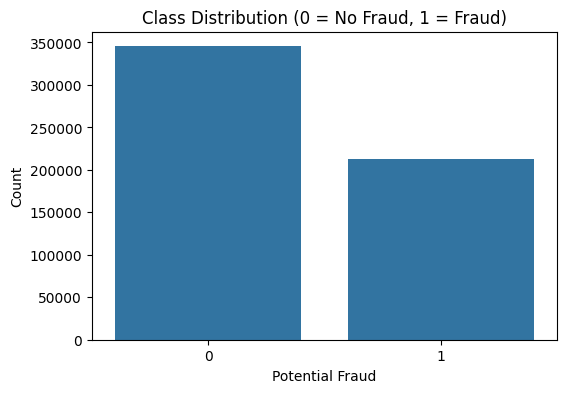

<Figure size 1200x500 with 0 Axes>

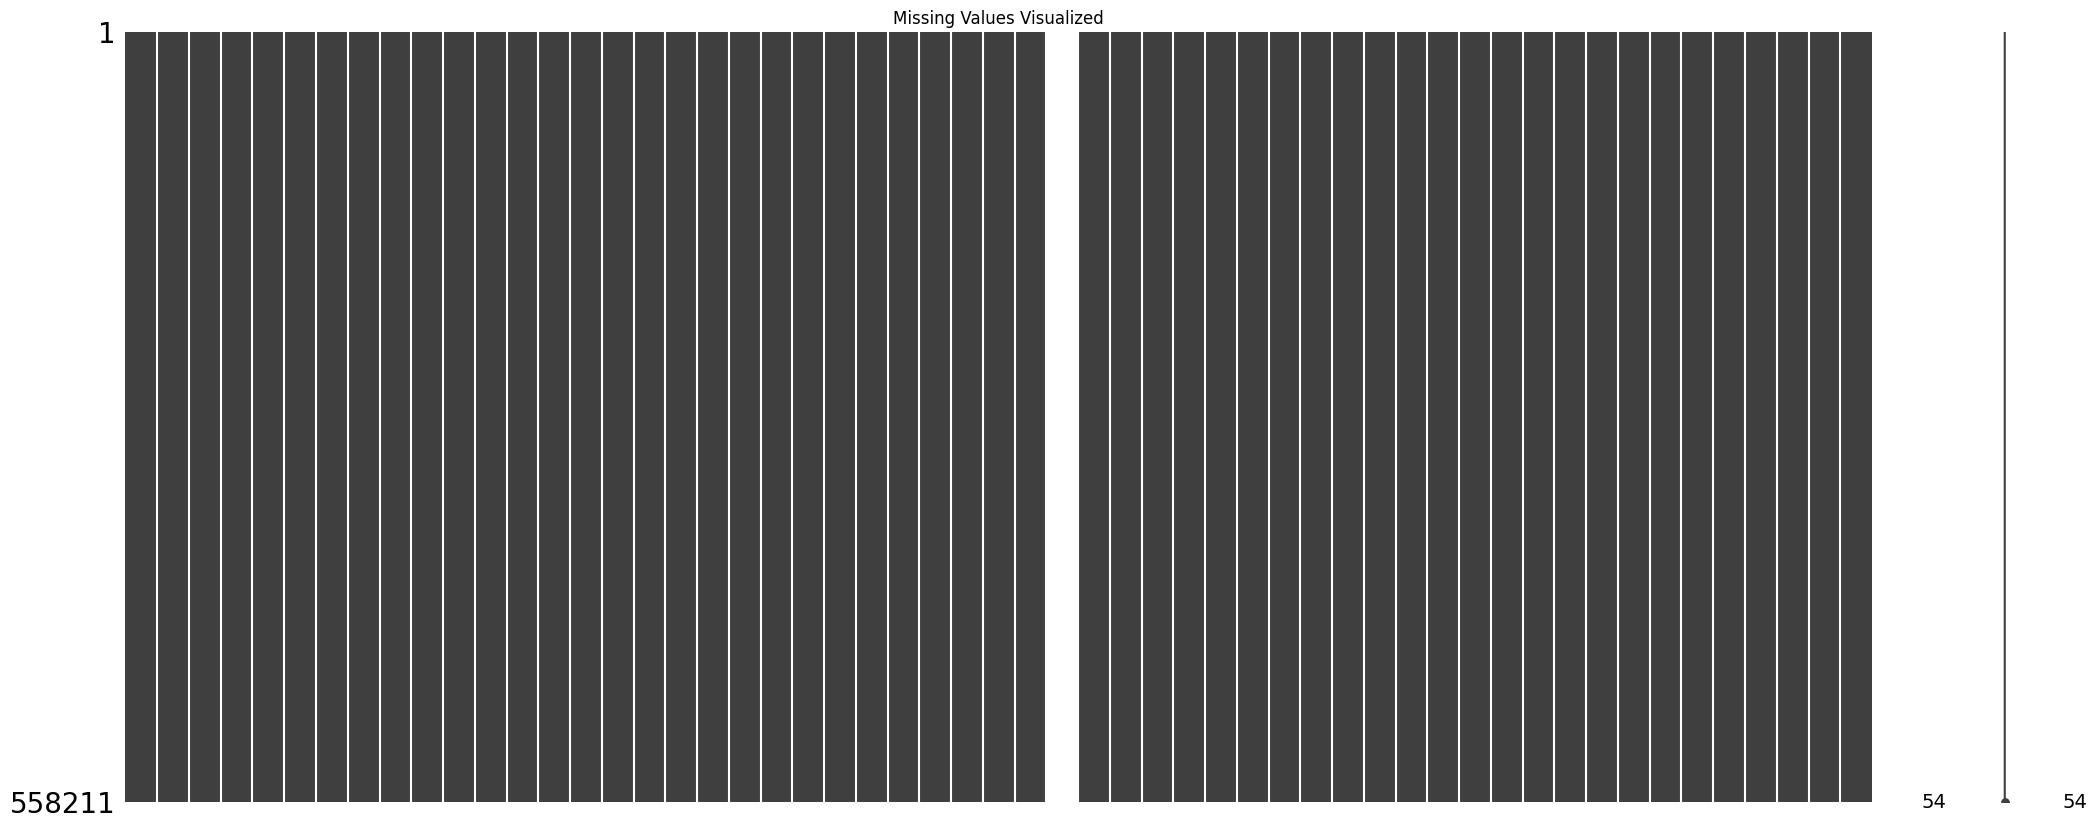

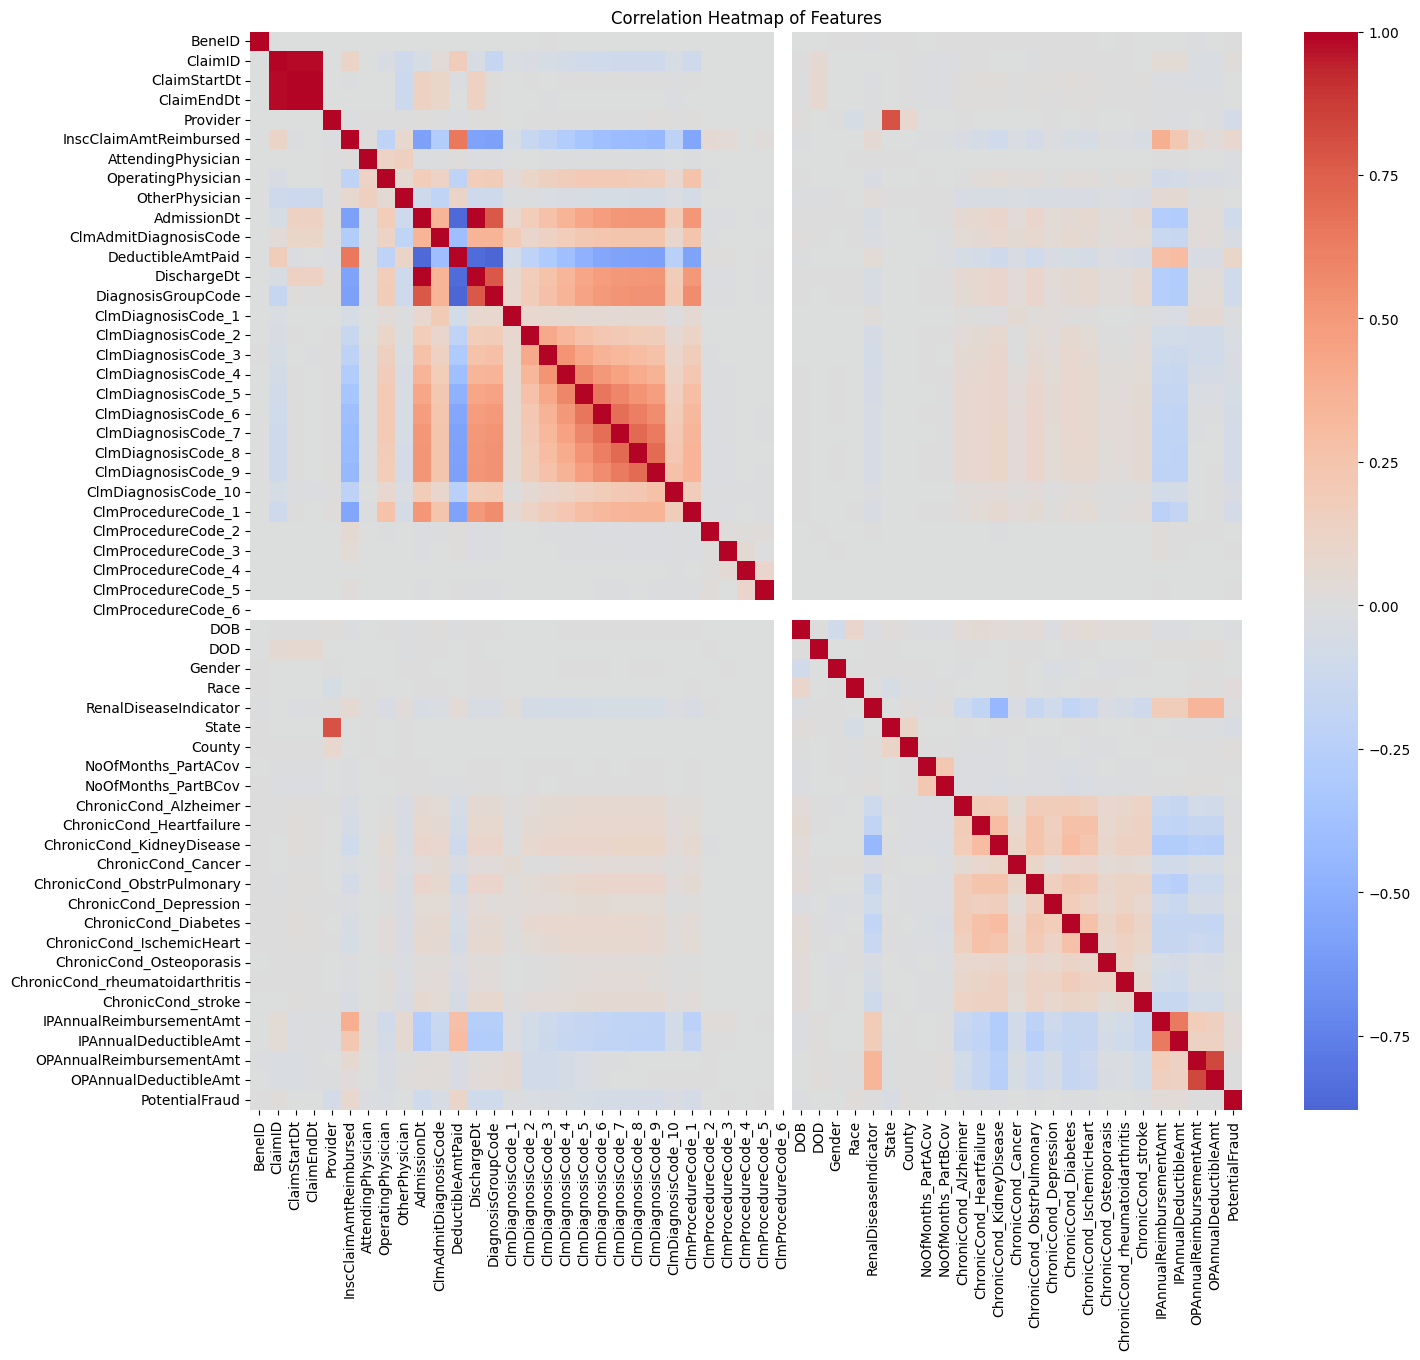

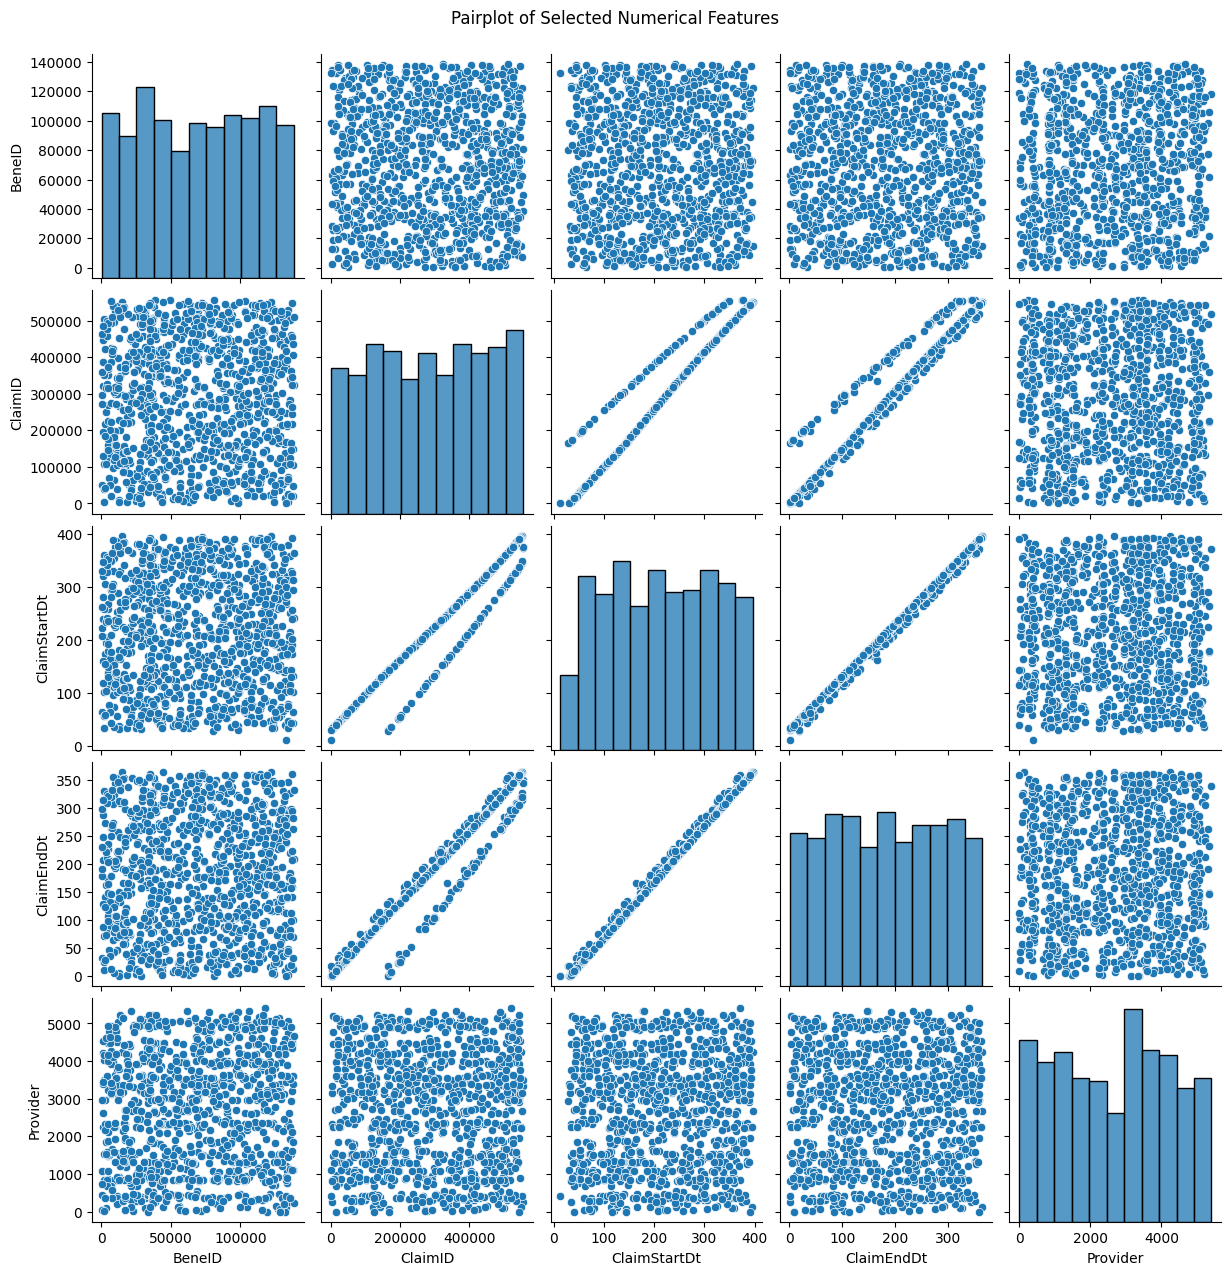

In [ ]:
# 📊 Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# ✨ Show summary statistics
print("📌 Summary statistics:")
display(merged_df.describe(include='all'))

# 🔍 Class distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='PotentialFraud', data=merged_df)
plt.title("Class Distribution (0 = No Fraud, 1 = Fraud)")
plt.xlabel("Potential Fraud")
plt.ylabel("Count")
plt.show()

# 🔎 Missing value matrix
plt.figure(figsize=(12, 5))
msno.matrix(merged_df)
plt.title("Missing Values Visualized")
plt.show()

# 🔥 Correlation heatmap (numeric columns only)
plt.figure(figsize=(16, 14))
sns.heatmap(merged_df.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# 🧠 Optional: pairplot for a small sample of numerical columns
num_cols = merged_df.select_dtypes(include=[np.number]).columns[:5]
sns.pairplot(merged_df[num_cols].sample(n=1000, random_state=42))
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()


In [ ]:
# 🧹 Drop columns with 100% missing values
X = X.dropna(axis=1, how='all')

# 🛡 Then reapply robust fill to partial-NaN columns
for col in X.columns:
    if X[col].isnull().any():
        if X[col].dtype in [np.float64, np.int64]:
            X[col].fillna(X[col].median(), inplace=True)
        else:
            mode_val = X[col].mode()
            X[col].fillna(mode_val[0] if not mode_val.empty else "Unknown", inplace=True)

# ✅ Final check
assert X.isnull().sum().sum() == 0, "❌ NaNs still remain in X."

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# 🎯 Define top K features to select
K = 30

# ⚙️ Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=min(K, X.shape[1]))
X_selected = selector.fit_transform(X, y)

# 🏷 Get feature names
selected_cols = X.columns[selector.get_support()].tolist()
print(f"✅ Top {len(selected_cols)} features selected using ANOVA F-test.")

# 📦 Create final DataFrame
df_selected = pd.DataFrame(X_selected, columns=selected_cols)
df_selected["PotentialFraud"] = y.reset_index(drop=True)

# 👁 Preview
print("🎯 Final dataset shape:", df_selected.shape)
display(df_selected.head())


✅ Top 30 features selected using ANOVA F-test.
🎯 Final dataset shape: (558211, 31)


,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,...,Race,State,County,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,PotentialFraud
0,299052.0,3928.0,26000.0,53275.0,35315.0,134.0,3022.0,1068.0,107.0,154.0,...,1.0,39.0,230.0,2.0,1.0,2.0,1.0,36000.0,3204.0,1
1,471344.0,3923.0,5000.0,4951.0,2132.0,275.0,2298.0,1068.0,244.0,580.0,...,1.0,39.0,230.0,2.0,1.0,2.0,1.0,36000.0,3204.0,0
2,491764.0,4034.0,5000.0,40843.0,35315.0,292.0,851.0,1068.0,262.0,665.0,...,1.0,39.0,230.0,2.0,1.0,2.0,1.0,36000.0,3204.0,0
3,226452.0,1125.0,5000.0,39020.0,23575.0,77.0,1602.0,1068.0,52.0,52.0,...,2.0,1.0,360.0,1.0,1.0,2.0,1.0,5000.0,1068.0,0
4,450337.0,4490.0,10000.0,45475.0,25118.0,257.0,2976.0,1068.0,241.0,721.0,...,1.0,45.0,780.0,1.0,1.0,1.0,2.0,21260.0,2136.0,0


In [ ]:
# 💾 Save selected features and target to CSV
output_path = "/content/drive/MyDrive/Project/healthcare/"

df_selected.to_csv(output_path + "Xy_selected_top30.csv", index=False)

print(f"✅ File saved: {output_path}Xy_selected_top30.csv")

✅ File saved: /content/drive/MyDrive/Project/healthcare/Xy_selected_top30.csv


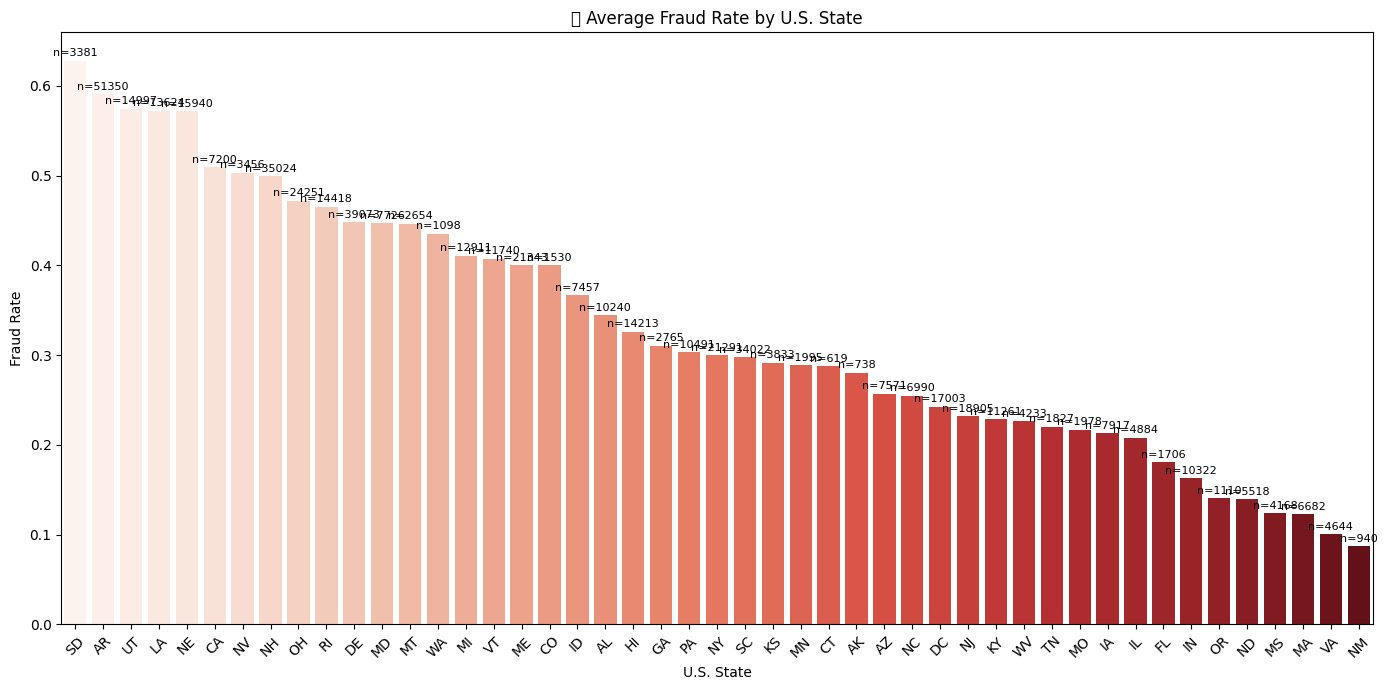

In [ ]:
# 📌 Step 1: State Code to Abbreviation Mapping
state_map = {
    1: "AL", 2: "AK", 4: "AZ", 5: "AR", 6: "CA", 8: "CO", 9: "CT", 10: "DE",
    11: "DC", 12: "FL", 13: "GA", 15: "HI", 16: "ID", 17: "IL", 18: "IN",
    19: "IA", 20: "KS", 21: "KY", 22: "LA", 23: "ME", 24: "MD", 25: "MA",
    26: "MI", 27: "MN", 28: "MS", 29: "MO", 30: "MT", 31: "NE", 32: "NV",
    33: "NH", 34: "NJ", 35: "NM", 36: "NY", 37: "NC", 38: "ND", 39: "OH",
    40: "OK", 41: "OR", 42: "PA", 44: "RI", 45: "SC", 46: "SD", 47: "TN",
    48: "TX", 49: "UT", 50: "VT", 51: "VA", 53: "WA", 54: "WV", 55: "WI", 56: "WY"
}

# 🧭 Step 2: Calculate Fraud Rate by State
merged_df["StateCode"] = merged_df["State"].map(state_map)
state_fraud = merged_df.groupby("StateCode")["PotentialFraud"].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# 📊 Step 3: Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=state_fraud.reset_index(), x="StateCode", y="mean", palette="Reds")
plt.title("📍 Average Fraud Rate by U.S. State")
plt.xlabel("U.S. State")
plt.ylabel("Fraud Rate")
for i, count in enumerate(state_fraud["count"]):
    plt.text(i, state_fraud["mean"].iloc[i] + 0.005, f'n={count}', ha='center', fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📌 What It Shows:
- Maps numeric State codes to U.S. abbreviations

- Calculates fraud rate per state (mean)

- Labels each bar with the sample size (n=)

- Helps identify fraud-prone regions and potential regional bias



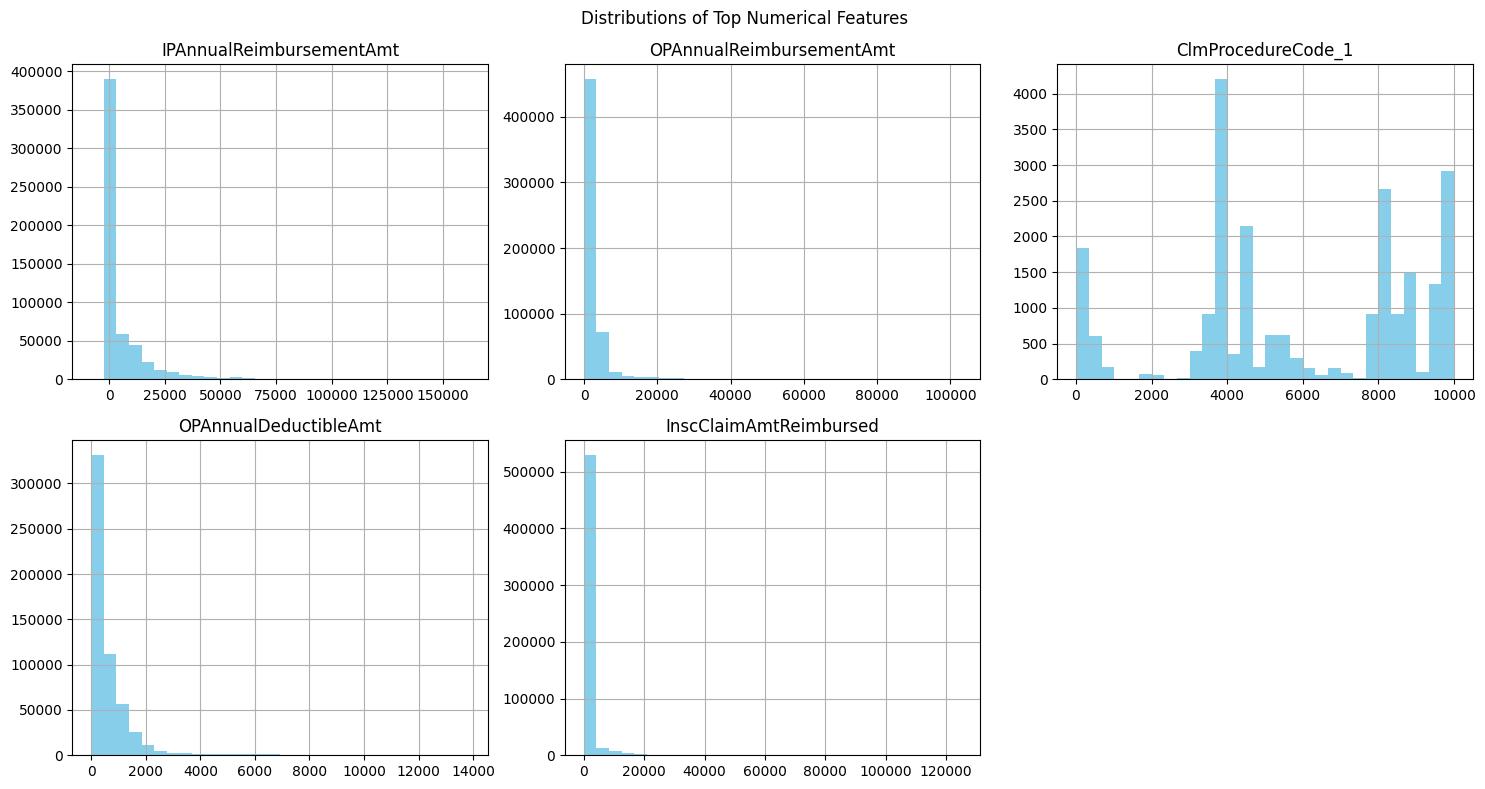

In [19]:
# 📊 Plot distribution of most varied numeric features
# 📊 Plot distribution of most varied numeric features
numeric_df = merged_df.select_dtypes(include=[np.number])

# ✅ Drop 'PotentialFraud' only if it exists
if 'PotentialFraud' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['PotentialFraud'])

top_numeric = numeric_df.nunique().sort_values(ascending=False).head(5).index

# 📉 Plot histograms
numeric_df[top_numeric].hist(bins=30, figsize=(15, 8), layout=(2, 3), color='skyblue')
plt.suptitle("Distributions of Top Numerical Features")
plt.tight_layout()
plt.show()

### Numeric Feature Distributions
- Why: Detect skewness, outliers, and need for transformations.

- What: Histograms of top numerical features like InscClaimAmtReimbursed.

- Useful For: Deciding preprocessing steps (e.g., log scale for skewed claims).



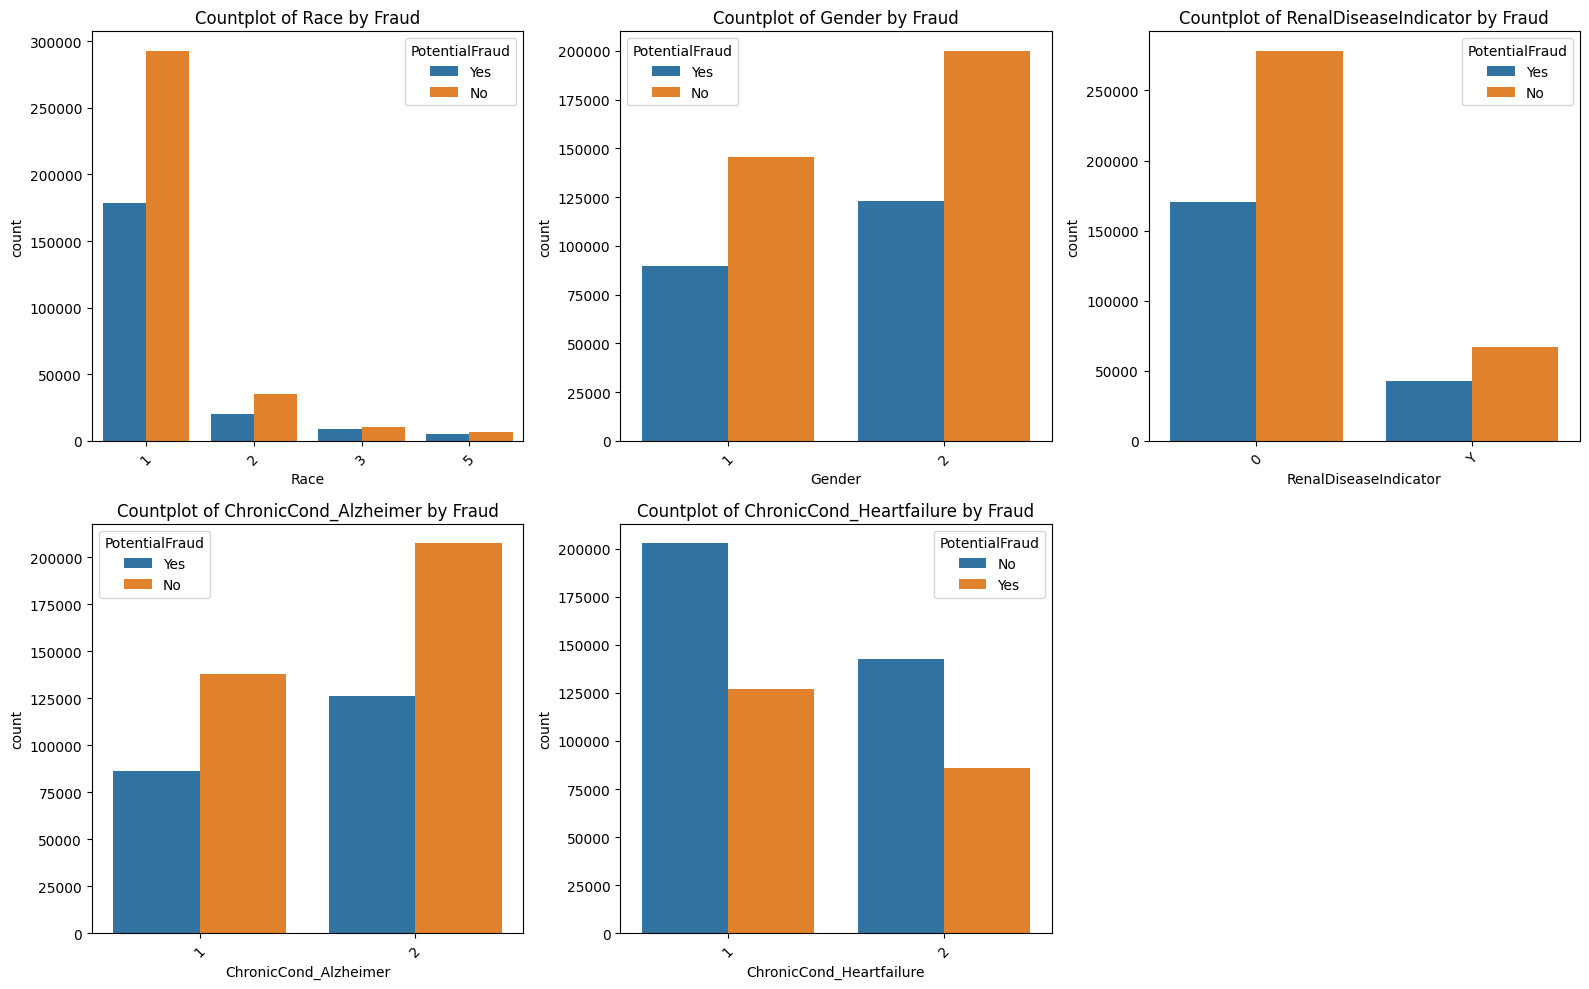

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Plot distribution of top categorical variables by fraud
cat_cols = ['Race', 'Gender', 'RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure']

plt.figure(figsize=(16, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=merged_df, hue='PotentialFraud')
    plt.title(f"Countplot of {col} by Fraud")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Categorical Feature Countplots
- Why: Understand class-wise distribution for top categorical features.

- What: Count of values split by fraud vs. non-fraud for variables like DiagnosisGroupCode.

- Useful For: Spotting high-risk categories (e.g., certain codes linked with more fraud).

In [27]:
# ✅ Recreate the column for number of chronic conditions
chronic_cols = [col for col in merged_df.columns if "ChronicCond_" in col]
merged_df["TotalChronicConditions"] = (merged_df[chronic_cols] == 1).sum(axis=1)


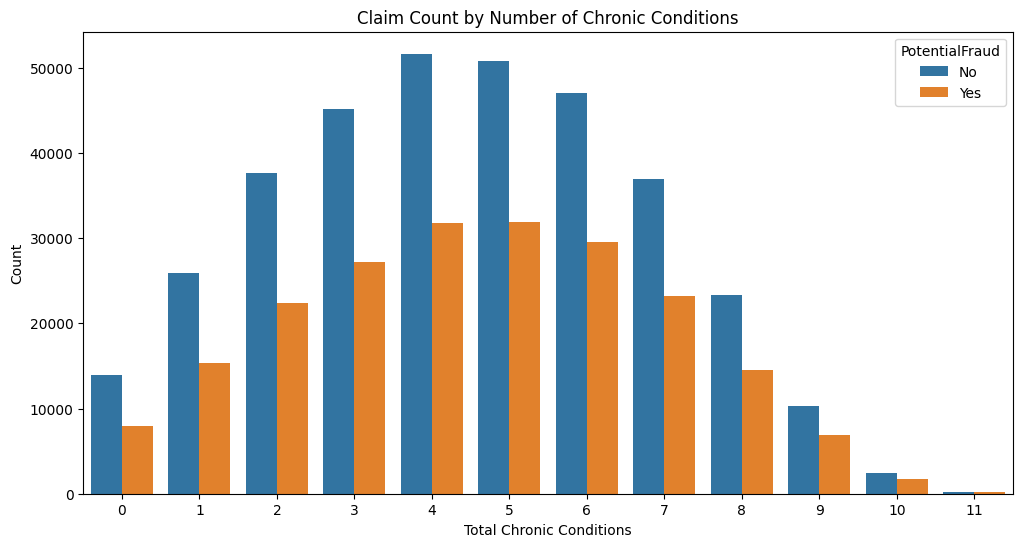

In [28]:
# 📊 Frequency of fraud based on number of chronic conditions
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x="TotalChronicConditions", hue="PotentialFraud")
plt.title("Claim Count by Number of Chronic Conditions")
plt.xlabel("Total Chronic Conditions")
plt.ylabel("Count")
plt.show()


### Fraud vs. Chronic Conditions
- Why: Examine fraud prevalence among patients with multiple chronic illnesses.

- What: Bar chart of fraud vs. number of chronic conditions.

- Useful For: Understanding patient risk groups and engineering stronger features.



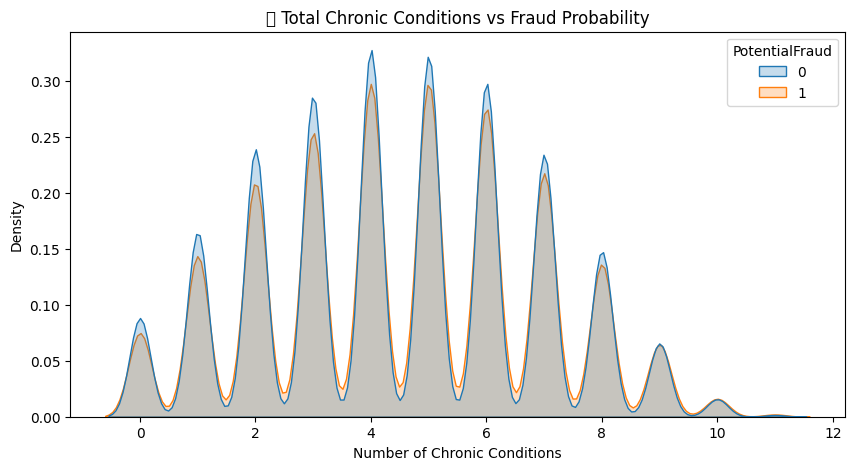

In [ ]:
# 🧬 Combine chronic condition columns
chronic_cols = [col for col in merged_df.columns if "ChronicCond_" in col]
merged_df["TotalChronicConditions"] = (merged_df[chronic_cols] == 1).sum(axis=1)

plt.figure(figsize=(10, 5))
sns.kdeplot(data=merged_df, x="TotalChronicConditions", hue="PotentialFraud", fill=True, common_norm=False)
plt.title("🧠 Total Chronic Conditions vs Fraud Probability")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Density")
plt.show()


### 📌 What It Shows:
- Computes how many chronic conditions each patient has

- Visualizes their distribution split by fraud class

- Highlights if sicker patients are more/less likely to be associated with fraud



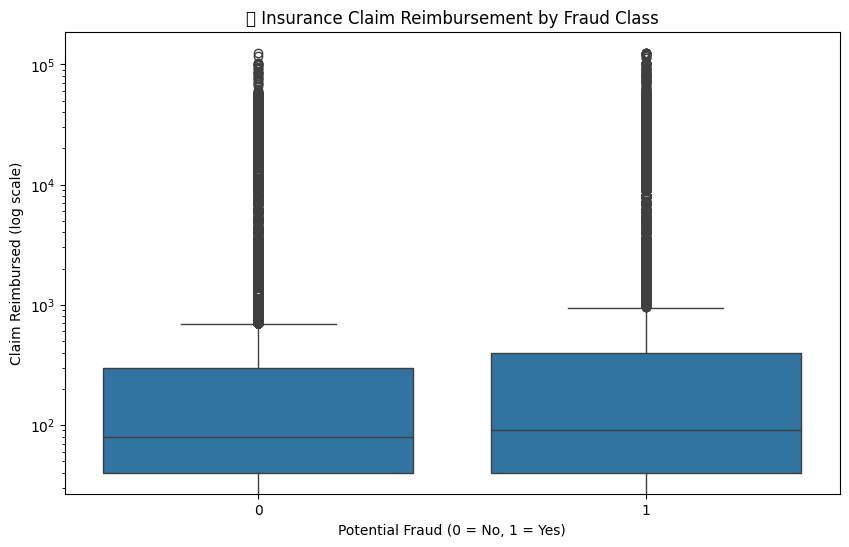

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="PotentialFraud", y="InscClaimAmtReimbursed")
plt.yscale("log")  # Claims are highly skewed
plt.title("💵 Insurance Claim Reimbursement by Fraud Class")
plt.xlabel("Potential Fraud (0 = No, 1 = Yes)")
plt.ylabel("Claim Reimbursed (log scale)")
plt.show()


### 📌 What It Shows:
- Uses log-scale to handle skewed reimbursement amounts

- Compares financial claims for fraud vs. non-fraud cases

- Helps detect anomalous payout behavior



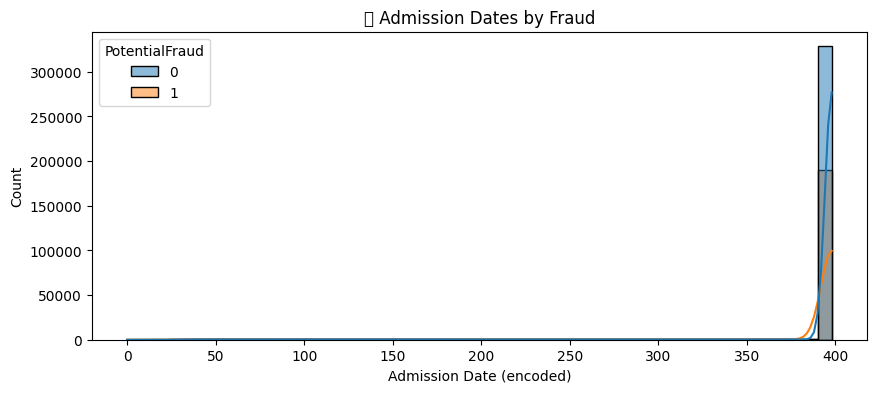

In [ ]:
# Optional if dates are numeric; otherwise parse first
if np.issubdtype(merged_df["AdmissionDt"].dtype, np.number):
    plt.figure(figsize=(10, 4))
    sns.histplot(data=merged_df, x="AdmissionDt", hue="PotentialFraud", bins=50, kde=True)
    plt.title("📅 Admission Dates by Fraud")
    plt.xlabel("Admission Date (encoded)")
    plt.ylabel("Count")
    plt.show()


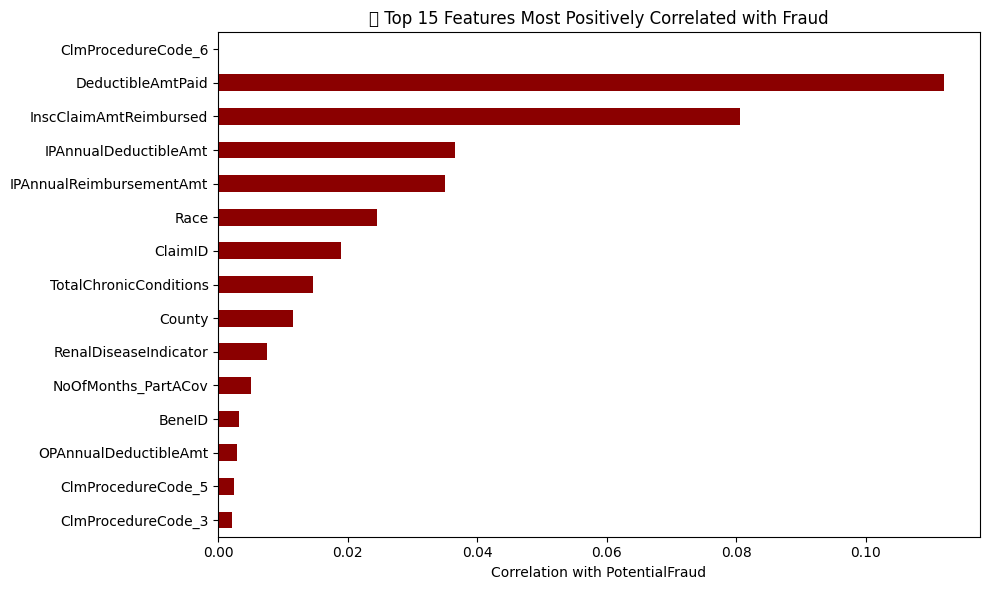

In [ ]:
# 🔬 Correlation of features with PotentialFraud
corrs = merged_df.corr()["PotentialFraud"].drop("PotentialFraud").sort_values()

plt.figure(figsize=(10, 6))
corrs.tail(15).plot(kind="barh", color="darkred")
plt.title("📌 Top 15 Features Most Positively Correlated with Fraud")
plt.xlabel("Correlation with PotentialFraud")
plt.tight_layout()
plt.show()


### 📌 What It Shows:
- Displays the **top 15 features most positively correlated** with the fraud label.
- Helps identify **predictive signals** in the data, such as high reimbursement amounts, specific procedure codes, or regional indicators.
- Useful for selecting candidate features for models and for detecting **potential sources of bias**, like race or geographic location.
- Some medically specific codes or behaviors (like many chronic conditions or renal disease) appear to be **linked to higher fraud probability**, potentially due to overbilling or policy manipulation.
